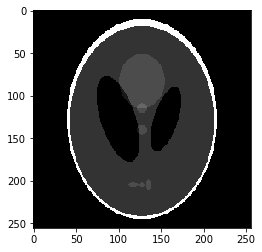

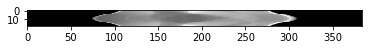

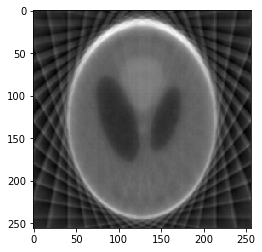

In [12]:
import astra
import matplotlib.pyplot as plt
import numpy as np

ol_geom = astra.create_vol_geom(256, 256)
proj_geom = astra.create_proj_geom('parallel', 1.0, 384, np.linspace(0,np.pi,18,False))

# For CPU-based algorithms, a "projector" object specifies the projection
# model used. In this case, we use the "strip" model.
proj_id = astra.create_projector('strip', proj_geom, vol_geom)

# Create a sinogram from a phantom
import scipy.io
P = scipy.io.loadmat('phantom.mat')['phantom256']
sinogram_id, sinogram = astra.create_sino(P, proj_id)

import pylab
pylab.gray()
pylab.figure(1)
pylab.imshow(P)
pylab.figure(2)
pylab.imshow(sinogram)

# Create a data object for the reconstruction
rec_id = astra.data2d.create('-vol', vol_geom)

# Set up the parameters for a reconstruction algorithm using the CPU
# The main difference with the configuration of a GPU algorithm is the
# extra ProjectorId setting.
cfg = astra.astra_dict('SIRT')
cfg['ReconstructionDataId'] = rec_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ProjectorId'] = proj_id

# Available algorithms:
# ART, SART, SIRT, CGLS, FBP


# Create the algorithm object from the configuration structure
alg_id = astra.algorithm.create(cfg)

# Run 20 iterations of the algorithm
# This will have a runtime in the order of 10 seconds.
astra.algorithm.run(alg_id, 20)

# Get the result
rec = astra.data2d.get(rec_id)
pylab.figure(3)
pylab.imshow(rec)
pylab.show()

# Clean up.
astra.algorithm.delete(alg_id)
astra.data2d.delete(rec_id)
astra.data2d.delete(sinogram_id)
astra.projector.delete(proj_id)
